<a href="https://colab.research.google.com/github/PabloJRW/NN-digits-clf/blob/main/NN_Digits_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [56]:
# Network and training parameters
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

# Loading NMIST dataset
mnist = keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# X_train is 60000 rows of 28 x 28; we --> reshape it to 60000 x 786
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [57]:
# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,), name='dense_layer_3', activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Compiling the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Training the model 
history = model.fit(X_train, y_train,
         batch_size=BATCH_SIZE,
         epochs=EPOCHS,
         verbose=VERBOSE,
         validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 1.7688 - accuracy: 0.4361 - val_loss: 0.9594 - val_accuracy: 0.8137
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.9407 - accuracy: 0.7157 - val_loss: 0.5407 - val_accuracy: 0.8731
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.7068 - accuracy: 0.7858 - val_loss: 0.4281 - val_accuracy: 0.8888
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5957 - accuracy: 0.8196 - val_loss: 0.3737 - val_accuracy: 0.9008
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5380 - accuracy: 0.8395 - val_loss: 0.3414 - val_accuracy: 0.9067
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4919 - accuracy: 0.8530 - val_loss: 0.3165 - val_accuracy: 0.9119
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4587 - accuracy: 0.8657 - val_loss: 0.2974 - val_accuracy: 0.9172
Epoch 

In [60]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9628
Test accuracy:  0.9628000259399414


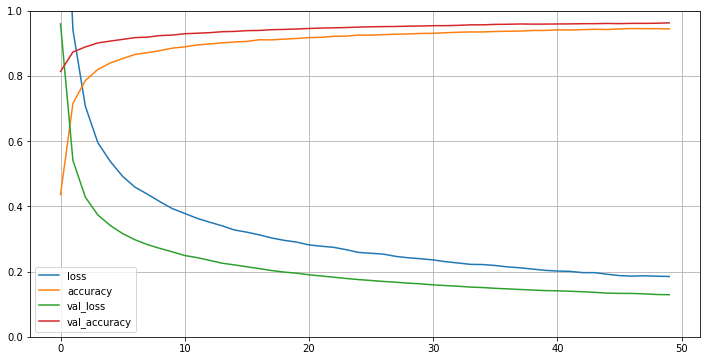

In [61]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
# Saving the model
model.save("digits_clf.h5")